In [375]:
import numpy as np
import pandas as pd
import math
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
from itertools import combinations
import random as rn 
from statsmodels.graphics.regressionplots import plot_leverage_resid2, influence_plot
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

### Получаем датафрейм для работы 

In [376]:
data = pd.read_csv('General_Table_3.csv', sep = ';',index_col=False)
test = pd.read_csv('General_Table_4.csv', sep = ';',index_col=False)

In [377]:
#объекты, для которых нужно построить предсказательную модель
test

,Unnamed: 0,Object,Square,Place,Material,Finish,Otd_Vstr,Transport,Otopl,Nazn
0,1,Object 1,494.5,3,1,2,1,5,1,3
1,2,Object 2,298.5,3,1,2,1,5,1,3
2,3,Object 3,8.0,3,1,2,1,5,1,1
3,4,Object 4,361.1,3,1,2,1,5,1,3
4,5,Object 5,1755.6,3,1,2,1,5,1,3
5,6,Object 6,316.4,3,1,2,1,5,1,3
6,7,Object 7,587.1,3,1,2,1,5,1,3
7,8,Object 8,4698.7,2,1,2,1,3,1,3


In [378]:
#что представляют собой данные
data.head(5)

,Unnamed: 0,Object,Square,Place,Material,Finish,Otd_Vstr,Transport,Otopl,Nazn,ValueForSquareMetre
0,1,Analog 1,300,2,1,3,1,3,1,3,211.60
1,2,Analog 2,300,1,0,1,1,1,0,2,61.33
2,3,Analog 3,510,2,1,2,1,1,1,3,153.33
3,4,Analog 4,150,4,1,1,0,4,1,2,276.00
4,5,Analog 5,1000,2,0,2,1,2,1,2,184.00


In [379]:
#data[0] - количество аналогов, data[1] - количество признаков
data.shape

(39, 11)

In [380]:
#таблица корреляций признаков между собой
data.corr()

,Unnamed: 0,Square,Place,Material,Finish,Otd_Vstr,Transport,Otopl,Nazn,ValueForSquareMetre
Unnamed: 0,1.000000,0.138855,0.103908,0.309409,-0.071561,-0.068551,0.153542,-0.071240,-0.271584,-0.089716
Square,0.138855,1.000000,-0.352562,0.054654,-0.122120,0.259241,-0.302166,-0.157061,-0.026056,-0.237734
Place,0.103908,-0.352562,1.000000,0.075378,0.177967,-0.109109,0.861164,0.259851,0.102379,0.551273
Material,0.309409,0.054654,0.075378,1.000000,0.050082,-0.252215,0.136843,0.170941,0.308683,0.322106
Finish,-0.071561,-0.122120,0.177967,0.050082,1.000000,0.041425,0.236930,0.390138,0.346585,0.401459
Otd_Vstr,-0.068551,0.259241,-0.109109,-0.252215,0.041425,1.000000,-0.066026,-0.298985,0.153903,-0.371054
Transport,0.153542,-0.302166,0.861164,0.136843,0.236930,-0.066026,1.000000,0.271608,0.227163,0.567327
Otopl,-0.071240,-0.157061,0.259851,0.170941,0.390138,-0.298985,0.271608,1.000000,0.296665,0.670720
Nazn,-0.271584,-0.026056,0.102379,0.308683,0.346585,0.153903,0.227163,0.296665,1.000000,0.382345
ValueForSquareMetre,-0.089716,-0.237734,0.551273,0.322106,0.401459,-0.371054,0.567327,0.670720,0.382345,1.000000


# Работа со всеми признаками 

In [381]:
#размер листа равен количеству столбцов в матрице в данными
list = range(data.shape[0])

In [382]:
rn.seed(5)
for i in range(10000):#сколько регрессионных моделей будет построено
    people_number = rn.randint(20, 27) #количество аналогов в каждой из построенных моделей
    combin = rn.sample(list,people_number) #комбинация из people_number аналогов (рандомные позиции в исходном датафрейме)
    random_dataframe = pd.DataFrame(data=data.ix[combin,])# составленный датафрейм поданный на обучение
    m1 = smf.ols('ValueForSquareMetre ~ Square + Place + Material + Finish + Otd_Vstr + Transport + Otopl + Nazn', data=random_dataframe)
    fitted = m1.fit()
    if (fitted.rsquared >= 0.8 and fitted.params['Square'] < 0 and fitted.params['Place'] > 0 and fitted.params['Material'] > 0 and 
        fitted.params['Transport'] > 0 and fitted.params['Otopl'] > 0 and fitted.params['Finish'] > 0 and fitted.params['Nazn'] > 0 and
        fitted.params['Otd_Vstr'] > 0 and np.all(np.array(fitted.params['Intercept'] + fitted.params['Square']*test['Square'] + fitted.params['Place']*test['Place'] + 
        fitted.params['Material']*test['Material'] + fitted.params['Transport']*test['Transport'] + fitted.params['Otopl']*test['Otopl'] + fitted.params['Nazn']*test['Nazn'] + fitted.params['Finish']*test['Finish'] + 
        fitted.params['Otd_Vstr']*test['Otd_Vstr']).reshape(-1,1) < 270) and np.all(np.array(fitted.params['Intercept'] + fitted.params['Square']*test['Square'] + fitted.params['Place']*test['Place'] + 
        fitted.params['Material']*test['Material'] + fitted.params['Transport']*test['Transport'] + fitted.params['Otopl']*test['Otopl'] + fitted.params['Nazn']*test['Nazn'] + fitted.params['Finish']*test['Finish'] + 
        fitted.params['Otd_Vstr']*test['Otd_Vstr']).reshape(-1,1)) > 0):
        m2 = smf.ols('np.log(ValueForSquareMetre) ~ Square + Place + Material + Finish + Otd_Vstr + Transport + Otopl + Nazn', data=random_dataframe)
        fitted_second = m2.fit()
        if (fitted_second.rsquared >= 0.7 and math.exp(fitted_second.params['Square']) < 1 and math.exp(fitted_second.params['Place']) > 1 
            and math.exp(fitted_second.params['Material']) > 1 and math.exp(fitted_second.params['Transport']) > 1 and 
            math.exp(fitted_second.params['Otopl']) > 1 and math.exp(fitted_second.params['Finish']) > 1 and math.exp(fitted_second.params['Nazn']) > 1 and
            math.exp(fitted_second.params['Otd_Vstr']) > 1 and np.all(math.exp(fitted_second.params['Intercept'])*  
            math.exp(fitted_second.params['Square'])**test['Square'] * math.exp(fitted_second.params['Place'])**test['Place'] * 
            math.exp(fitted_second.params['Material'])**test['Material'] * math.exp(fitted_second.params['Transport'])**test['Transport'] * 
            math.exp(fitted_second.params['Otopl'])**test['Otopl'] * math.exp(fitted_second.params['Nazn'])**test['Nazn'] * 
            math.exp(fitted_second.params['Finish'])**test['Finish'] * math.exp(fitted_second.params['Otd_Vstr'])**test['Otd_Vstr']) < 250 and np.all(math.exp(fitted_second.params['Intercept'])*  
            math.exp(fitted_second.params['Square'])**test['Square'] * math.exp(fitted_second.params['Place'])**test['Place'] * 
            math.exp(fitted_second.params['Material'])**test['Material'] * math.exp(fitted_second.params['Transport'])**test['Transport'] * 
            math.exp(fitted_second.params['Otopl'])**test['Otopl'] * math.exp(fitted_second.params['Nazn'])**test['Nazn'] * 
            math.exp(fitted_second.params['Finish'])**test['Finish'] * math.exp(fitted_second.params['Otd_Vstr'])**test['Otd_Vstr']) > 0):
            print(random_dataframe)
            print(fitted.summary())
            print(fitted_second.summary())
            break

    Unnamed: 0     Object  Square  Place  Material  Finish  Otd_Vstr  \
36          37  Analog 37     315      2         1       1         0   
8            9   Analog 9     260      3         0       2         1   
0            1   Analog 1     300      2         1       3         1   
25          26  Analog 26     250      3         1       1         1   
10          11  Analog 11      84      2         1       1         1   
7            8   Analog 8     400      2         1       2         0   
33          34  Analog 34     350      2         1       3         0   
20          21  Analog 21    1000      3         1       2         1   
17          18  Analog 18     450      1         0       1         1   
29          30  Analog 30     350      2         1       3         0   
13          14  Analog 14     215      3         1       2         0   
9           10  Analog 10     800      1         1       2         1   
19          20  Analog 20     300      2         1       2      

In [383]:
#количество аналогов в построенной модели
random_dataframe['Object'].shape

(24,)

In [384]:
# предсказания по линейной модели
print(fitted.params['Intercept'] + fitted.params['Square']*test['Square'] + fitted.params['Transport']*test['Transport'] + 
      fitted.params['Place']*test['Place'] + fitted.params['Material']*test['Material'] + 
      fitted.params['Otopl']*test['Otopl']+ fitted.params['Nazn']*test['Nazn'] +
      fitted.params['Finish']*test['Finish'] + fitted.params['Otd_Vstr']*test['Otd_Vstr'])

0    243.230231
1    258.454420
2    250.353411
3    253.592000
4    145.275001
5    257.064048
6    236.037578
7   -112.497436
dtype: float64


In [385]:
#предсказания по экспоненциальной модели
print(math.exp(fitted_second.params['Intercept'])*math.exp(fitted_second.params['Square'])**test['Square']*math.exp(fitted_second.params['Transport'])**test['Transport']*math.exp(fitted_second.params['Place'])**test['Place']*math.exp(fitted_second.params['Material'])**test['Material']*math.exp(fitted_second.params['Otopl'])**test['Otopl']*math.exp(fitted_second.params['Nazn'])**test['Nazn']*math.exp(fitted_second.params['Finish'])**test['Finish']*math.exp(fitted_second.params['Otd_Vstr'])**test['Otd_Vstr']) 

0    233.407417
1    247.663493
2    258.494820
3    243.018093
4    159.386501
5    246.326183
6    226.960536
7     54.412589
dtype: float64


Посмотрим на наблюдения, которые сильно влияют на регрессионное уравнение --> это индексы аналогов(т.е. чтобы получить сами аналоги нужно к индексу прибавить 1)

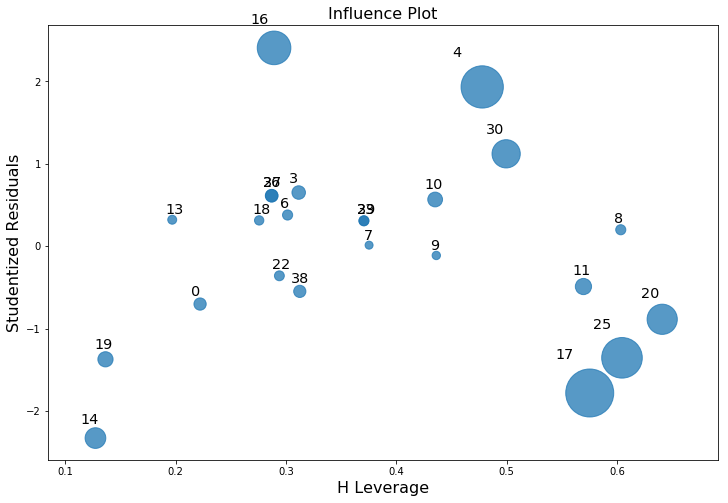

In [386]:
fig, ax = plt.subplots(figsize=(12,8))
fig = influence_plot(fitted, alpha=1,ax=ax)

In [387]:
#сохранить результаты в файл analogs.txt
np.savetxt(r'./analogs.txt', random_dataframe['Object'], fmt='%5s')

### Уменьшение размерности исходных даных


In [388]:
def change(value):
    if (value > 0 and value < 101):
        return 5
    if (value > 100 and value < 301):
        return 4
    if (value > 300 and value < 1001):
        return 3
    if (value > 1000 and value < 2001):
        return 2
    if (value > 2000):
        return 1

In [389]:
dict = {0:1, 1:2}
random_dataframe['Square'] = random_dataframe['Square'].apply(change)
random_dataframe['Material'] = random_dataframe['Material'].map(dict)
random_dataframe['Otd_Vstr'] = random_dataframe['Otd_Vstr'].map(dict)
random_dataframe['Otopl'] = random_dataframe['Otopl'].map(dict)

In [390]:
import sklearn
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_r = pca.fit(random_dataframe.iloc[:,2:-1]).transform(random_dataframe.iloc[:,2:-1])

In [391]:
pca.explained_variance_ratio_

array([ 0.58138099])

In [392]:
u,s,vh = np.linalg.svd(random_dataframe.iloc[:,2:-1])

In [393]:
projection = np.dot(random_dataframe.iloc[:,2:-1],(-(vh[np.argmax(s)])))

In [394]:
projection

array([ 4.67225121,  6.50113287,  7.51912717,  7.4120756 ,  7.19474791,
        6.47994654,  6.17908903,  8.00544987,  4.25136287,  6.17908903,
        7.2762819 ,  5.12190162,  6.25824342,  4.32907176,  8.15228906,
        4.67225121,  6.51161125,  7.89416913,  8.66658603,  9.74478091,
        7.6590701 ,  7.10133927,  5.672935  ,  9.36973896])

In [395]:
data_with_projection = random_dataframe
data_with_projection['projection'] = projection

In [396]:
fit_project = smf.ols('projection ~ Square + Place + Material + Finish + Otd_Vstr + Transport + Otopl + Nazn', data=data_with_projection)
res = fit_project.fit()

In [397]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             projection   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.891e+29
Date:                Thu, 15 Feb 2018   Prob (F-statistic):          4.20e-216
Time:                        19:50:58   Log-Likelihood:                 757.97
No. Observations:                  24   AIC:                            -1498.
Df Residuals:                      15   BIC:                            -1487.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.441e-15   1.19e-14      0.373      0.714   -2.09e-14    2.98e-14
Square         0.5395    2.4e-15   2.25e+14      0.000       0.539       0.539
Place          0.3750   2.93e-15   1.28e+14      0.000       0.375       0.375
Material       0.2602   3.86e-15   6.74e+13      0.000       0.260       0.260
Finish         0.2854   1.85e-15   1.54e+14      0.000       0.285       0.285
Otd_Vstr       0.2144   3.35e-15    6.4e+13      0.000       0.214       0.214
Transport      0.4681   1.78e-15   2.64e+14      0.000       0.468       0.468
Otopl          0.2612   3.64e-15   7.17e+13      0.000       0.261       0.261
Nazn           0.2931   1.93e-15   1.52e+14      0.000       0.293       0.293
==============================================================================
Omnibus:                        5.031   Durbin-Watson:                   0.185
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                1.645
Skew:                          -0.064   Prob(JB):                        0.439
Kurtosis:                       1.724   Cond. No.                         72.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [399]:
#lin_reg
from sklearn.linear_model import LinearRegression
lr =  LinearRegression()
lr.fit(projection.reshape(random_dataframe.shape[0],1), random_dataframe['ValueForSquareMetre'].reshape(24,1))
print(lr.coef_)
points = range(4,12)
predicts = lr.coef_* points

[[ 34.81491008]]


In [400]:
#exp_reg
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

xdata = np.linspace(3, 10, random_dataframe.shape[0])
ydata = random_dataframe['ValueForSquareMetre']
popt, pcov = curve_fit(func, xdata, ydata)

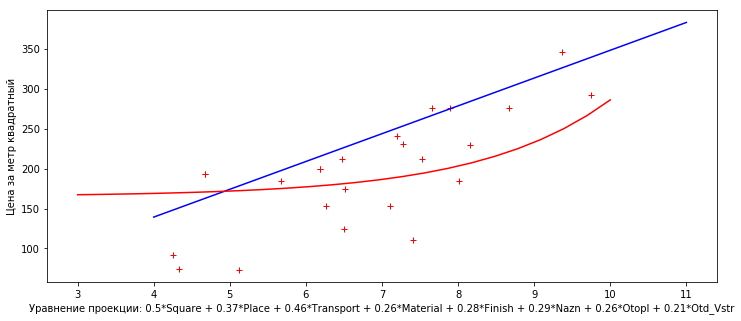

In [401]:
plt.figure(figsize = (12,5))
plt.plot(projection, random_dataframe['ValueForSquareMetre'], 'r+')
plt.plot(points, predicts.reshape(8,), 'b')
plt.plot(xdata, func(xdata, *popt), 'r-')
plt.xlabel('Уравнение проекции: 0.5*Square + 0.37*Place + 0.46*Transport + 0.26*Material + 0.28*Finish + 0.29*Nazn + 0.26*Otopl + 0.21*Otd_Vstr')
plt.ylabel('Цена за метр квадратный')

# Работа с частью признаков

In [402]:
def transform(data):
    list_of_features = []
    column = None
    for _ in range(100):
        column = input("Enter feature ")
        if (column != 'end'):
            list_of_features.append(column)
            data_fixed = data[list_of_features]
        else:
            break
    return data_fixed

In [403]:
data.head(4)

,Unnamed: 0,Object,Square,Place,Material,Finish,Otd_Vstr,Transport,Otopl,Nazn,ValueForSquareMetre
0,1,Analog 1,300,2,1,3,1,3,1,3,211.60
1,2,Analog 2,300,1,0,1,1,1,0,2,61.33
2,3,Analog 3,510,2,1,2,1,1,1,3,153.33
3,4,Analog 4,150,4,1,1,0,4,1,2,276.00


In [407]:
data_fixed = transform(data)

Enter feature Object
Enter feature Place
Enter feature Square
Enter feature ValueForSquareMetre
Enter feature end


In [408]:
data_fixed.head(10)

,Object,Place,Square,ValueForSquareMetre
0,Analog 1,2,300,211.60
1,Analog 2,1,300,61.33
2,Analog 3,2,510,153.33
3,Analog 4,4,150,276.00
4,Analog 5,2,1000,184.00
5,Analog 6,2,200,257.60
6,Analog 7,3,200,276.00
7,Analog 8,2,400,211.60
8,Analog 9,3,260,123.85
9,Analog 10,1,800,73.60


## Посотрим на корреляция признаков между собой

In [409]:
data_fixed.corr()

,Place,Square,ValueForSquareMetre
Place,1.000000,-0.352562,0.551273
Square,-0.352562,1.000000,-0.237734
ValueForSquareMetre,0.551273,-0.237734,1.000000


## Создаем лист из чисел(индексация начинается с нуля)

In [410]:
#размер листа равен количеству столбцов в матрице в данными
list = range(data_fixed.shape[0])

## Собственно само тело функции

In [411]:
seed = rn.random()
for i in range(100000):
    rn.seed(seed)
    seed += 1
    people_number = rn.randint(15, 25)
    combin = rn.sample(list,people_number)
    random_dataframe_part = pd.DataFrame(data=data_fixed.ix[combin,])#датафрейм в обучении 
    m1_part = smf.ols('ValueForSquareMetre ~ Square + Place ', data=random_dataframe_part)
    fitted_part = m1_part.fit()
    #print(fitted_part.rsquared)#del
    #print(fitted.params)
    if (fitted_part.rsquared >= 0.7 and fitted_part.params['Place'] > 0 and fitted_part.params['Square'] < 0 and np.all(np.array(fitted_part.params['Intercept'] + fitted_part.params['Square']*test['Square'] + fitted_part.params['Place']*test['Place']).reshape(-1,1) < 1000) and 
        np.all(np.array(fitted_part.params['Intercept'] + fitted_part.params['Square']*test['Square'] + fitted_part.params['Place']*test['Place']).reshape(-1,1) > 0)):
        m2_part = smf.ols('np.log(ValueForSquareMetre) ~ Square + Place', data=random_dataframe_part)
        fitted_second_part = m2_part.fit()

        if (fitted_second_part.rsquared >= 0.7 and math.exp(fitted_second_part.params['Place']) > 1 and math.exp(fitted_second_part.params['Square']) < 1 and np.all(math.exp(fitted_second_part.params['Intercept'])*  
            math.exp(fitted_second_part.params['Square'])**test['Square']*math.exp(fitted_second_part.params['Place'])**test['Place']) < 1000 and
            np.all(math.exp(fitted_second_part.params['Intercept'])*math.exp(fitted_second_part.params['Square'])*test['Square']**math.exp(fitted_second_part.params['Place'])**test['Place'])>0):
            print(random_dataframe_part)
            print(fitted_part.summary())
            print(fitted_second_part.summary())
            break

       Object  Place  Square  ValueForSquareMetre
33  Analog 34      2     350               199.77
26  Analog 27      3     118               276.00
28  Analog 29      3     700               318.06
0    Analog 1      2     300               211.60
6    Analog 7      3     200               276.00
32  Analog 33      3     200               207.00
4    Analog 5      2    1000               184.00
27  Analog 28      2     315               192.76
13  Analog 14      3     215               231.07
19  Analog 20      2     300               153.33
5    Analog 6      2     200               257.60
1    Analog 2      1     300                61.33
35  Analog 36      2    2100               138.00
22  Analog 23      4      63               292.06
30  Analog 31      1     800                74.75
31  Analog 32      3     150               276.00
16  Analog 17      3      93               346.24
                             OLS Regression Results                            
Dep. Variable:     V

## Параметры регрессионной модели + расчет для обьекта

In [412]:
print(fitted_part.params['Intercept'] + fitted_part.params['Square']*test['Square'] + fitted_part.params['Place']*test['Place'])

0    263.054368
1    267.207449
2    273.362909
3    265.881006
4    236.332683
5    266.828163
6    261.092250
7     94.211140
dtype: float64


In [413]:
print(math.exp(fitted_second_part.params['Intercept'])*math.exp(fitted_second_part.params['Square'])**test['Square']*math.exp(fitted_second_part.params['Place'])**test['Place']) 

0    264.708883
1    268.014327
2    272.989544
3    266.954147
4    244.394547
5    267.710748
6    263.161440
7    124.177350
dtype: float64


## Тест Фишера, проверяет нулевую гипотезу о том что все коэффициенты перед признаками в регрессионной модели можно положить равными нулю.

In [414]:
print(fitted.f_test('Square = Place = Material = Finish = Otd_Vstr = Transport = Otopl = Nazn = 0'))
# в данном случае для модели F-статистика Фишера равна 8.2922 - модель значима

<F test: F=array([[ 8.29226718]]), p=0.00025880274907404523, df_denom=15, df_num=8>


In [415]:
print(fitted.f_test('Place = Material = Finish = Otd_Vstr = Transport = 0'))
#на уровне значимости 0.05 можно отвергнуть нулевую гипотезу о том, что модель статистически значима.

<F test: F=array([[ 1.36927518]]), p=0.2903856324930016, df_denom=15, df_num=5>
